In [5]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html 

!pip install fastai 

# import libraries 

import fastai 

from fastai import * 

from fastai.text import *  

from functools import partial 

import io 

import os 

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install contractions
!pip install datasets
# !pip install pytorch_lightning
!pip install transformers

import tensorflow as tf
import torch

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

import pandas as pd
import numpy as np
import re
import string
import math
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import pandas as pd
import numpy as np

from tqdm.auto import tqdm

# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset, DataLoader

# from transformers import BertTokenizerFast as BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup

# import pytorch_lightning as pl
# from torchmetrics.functional import accuracy, f1_score, auroc
# from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
# from pytorch_lightning.loggers import TensorBoardLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix

from pylab import rcParams
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
import os



%matplotlib inline
%config InlineBackend.figure_format='retina'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
def preprocess(text):

  text=contractions.fix(text) # expanding the contractions
  text=text.lower() # lowering the text
  text=re.sub(r'[^\w\s]', '', text) # removing the punctuation
  text=''.join([i for i in text if not i.isdigit()]) # removing the digits and words containing the digits
  text=" ".join([word for word in str(text).split() if word not in stop_words]) # removing the stopwords
  text=" ".join([lemmatizer.lemmatize(word) for word in text.split()]) # lemmatizing the words

  return text



In [10]:
# from datasets import load_dataset

# dataset = load_dataset("ethos", "multilabel")


df=pd.read_csv('/content/gdrive/MyDrive/Dataset/train.csv')

In [11]:
# df=pd.DataFrame(data=dataset)
# df1=[]
# for i in df['train']:
#     df1.append(i)

# df=pd.DataFrame(df1)
# df
df=df.drop('id',axis=1)
df=df.rename(columns=({'comment_text':"text"}))
df

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [12]:
df['text']=df['text'].apply(lambda x: preprocess(x))
df

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,daww match background colour seemingly stuck t...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,cannot make real suggestion improvement wonder...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0
159567,ashamed horrible thing put talk page,0,0,0,0,0,0
159568,spitzer umm actual article prostitution ring c...,0,0,0,0,0,0
159569,look like actually put speedy first version de...,0,0,0,0,0,0


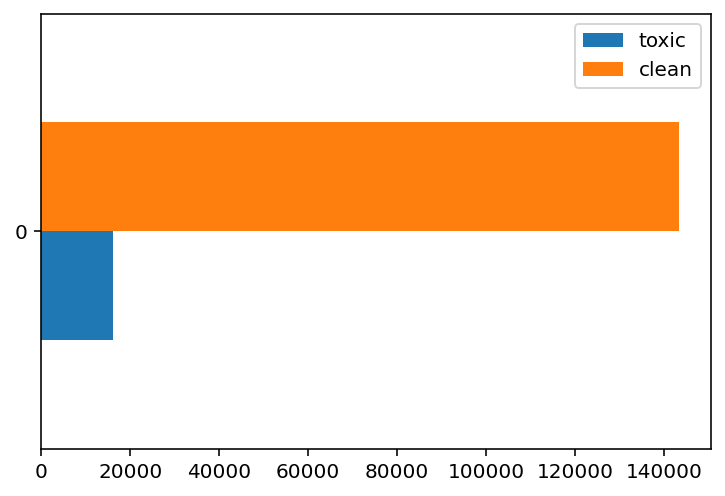

In [13]:
LABEL_COLUMNS = df.columns.tolist()[1:]
df_toxic = df[df[LABEL_COLUMNS].sum(axis=1) > 0]
df_clean = df[df[LABEL_COLUMNS].sum(axis=1) == 0]

pd.DataFrame(dict(
  toxic=[len(df_toxic)], 
  clean=[len(df_clean)]
)).plot(kind='barh');

In [14]:
df_clean=df_clean[:8000]
df_toxic=df_toxic[:8000]
df = df_toxic.append(df_clean, ignore_index=True)
df

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,cocksucker piss around work,1,1,1,0,1,0
1,hey talk exclusive group wp talibanswho good d...,1,0,0,0,0,0
2,bye look come think comming back tosser,1,0,0,0,0,0
3,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1
4,fuck filthy mother as dry,1,0,1,0,1,0
...,...,...,...,...,...,...,...
15995,based cure song sometimes band compared stylis...,0,0,0,0,0,0
15996,largest swing smaller one three orderinchaos,0,0,0,0,0,0
15997,november thank experimenting wikipedia test wo...,0,0,0,0,0,0
15998,many thanks jack soothing refreshing,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2,random_state=19)

In [16]:
type(train)

pandas.core.frame.DataFrame

In [17]:
type(test)

pandas.core.frame.DataFrame

In [18]:
df.isnull().sum()

text             0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [19]:
pd.concat([train['text'],test['text']]).to_csv( 

    'unlabeled_data.csv', index=None, header=True)

In [20]:
train[['text', 'toxic','severe_toxic','obscene','threat','insult','identity_hate']].to_csv( 

    'train.csv', index=None, header=True) 

In [21]:
test[['text']].to_csv('test.csv', index=None, header=True) 

In [22]:
folder = '.' 

unlabeled_file = 'unlabeled_data.csv' 


In [23]:
sample=pd.read_csv(unlabeled_file)
sample.isna().sum()

text    5
dtype: int64

In [24]:
sample=sample.dropna()
sample.isna().sum()

text    0
dtype: int64

In [25]:
sample.to_csv('preprocessed_unlabeled_data.csv')

In [26]:
preprocessed_unlabeled_data='preprocessed_unlabeled_data.csv'

In [27]:
data_lm = TextLMDataBunch.from_csv(folder, preprocessed_unlabeled_data, text_cols='text') 

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.47E-02
Min loss divided by 10: 2.82E-02


0.044668359215096314

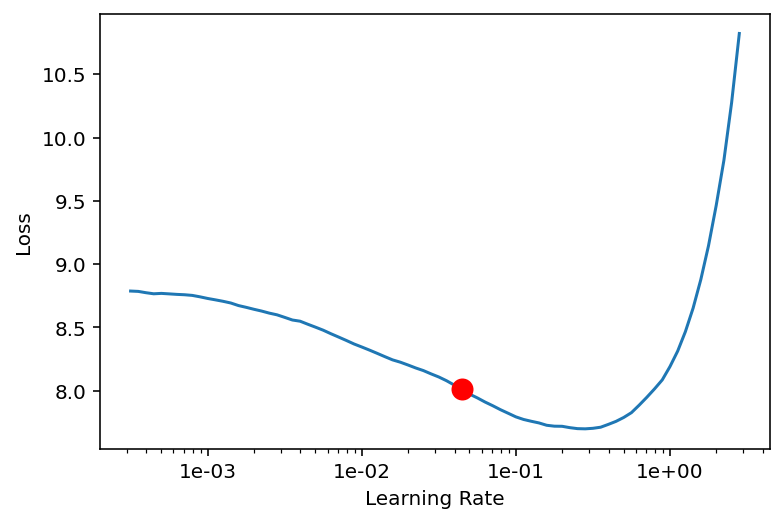

In [28]:
learn = language_model_learner(data_lm, drop_mult=0.3, arch=AWD_LSTM) 



learn.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10)) 

learn.recorder.plot(skip_end=10, suggestion=True) 

best_lm_lr = learn.recorder.min_grad_lr 

best_lm_lr 

In [29]:
learn.fit_one_cycle(1, best_lm_lr) 

learn.unfreeze() 

epoch,train_loss,valid_loss,accuracy,time
0,7.360829,6.720066,0.129028,00:19


In [30]:
learn.fit_one_cycle(1, best_lm_lr) 

learn.predict('toxic comments', n_words=200) 

learn.save_encoder('toxic_enc') 

epoch,train_loss,valid_loss,accuracy,time
0,7.256030,6.948058,0.115188,00:24


In [31]:
sample_train=pd.read_csv('train.csv')
sample_train.isna().sum()


text             5
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [32]:
sample_train=sample_train.dropna()
sample_train.isna().sum()

text             0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [33]:

sample_train.to_csv('processed_train.csv')

In [34]:
sample_test=pd.read_csv('test.csv')
sample_test.isna().sum()


text    0
dtype: int64

In [35]:
sample_test=sample_test.dropna()
sample_test.isna().sum()

text    0
dtype: int64

In [36]:
sample_train.to_csv('processed_test.csv')

In [37]:
train_file, test_file = 'processed_train.csv', 'processed_test.csv' 

data_clas = TextClasDataBunch.from_csv(path=folder,  

                                        csv_name=train_file, 

                                        test=test_file, 

                                        vocab=data_lm.train_ds.vocab,  

                                        bs=64, 

                                        text_cols='text',  

                                        label_cols=['toxic','severe_toxic','obscene','threat','insult','identity_hate']) 

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


epoch,train_loss,valid_loss,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.47E-02
Min loss divided by 10: 1.12E-01


0.04466835921509634

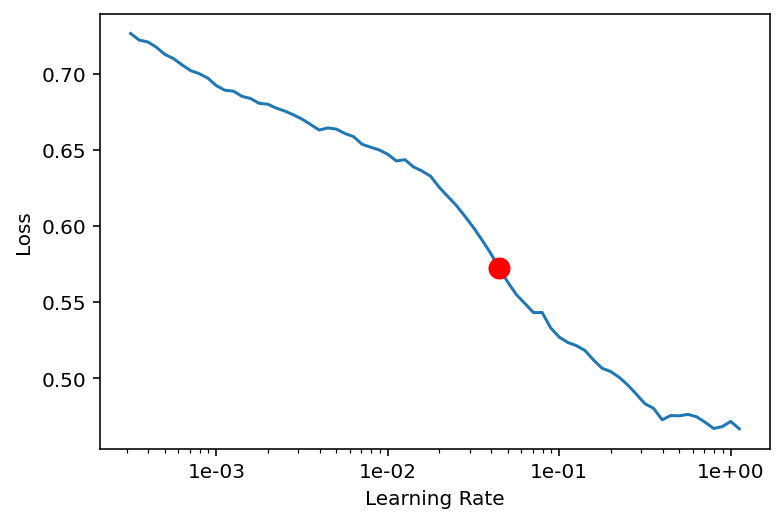

In [38]:
data_clas.save('ulmfit_data_clas_toxic') 

learn_clas = text_classifier_learner(data_clas, drop_mult=0.3, arch=AWD_LSTM) 

learn_clas.load_encoder('toxic_enc') 

learn_clas.lr_find(start_lr=slice(10e-7, 10e-5), end_lr=slice(0.1, 10)) 

learn_clas.recorder.plot(skip_end=10, suggestion=True) 

best_clf_lr = learn_clas.recorder.min_grad_lr 

best_clf_lr 

In [39]:
learn_clas.fit_one_cycle(2, best_clf_lr) 

learn_clas.freeze_to(-2) 

learn_clas.fit_one_cycle(2, best_clf_lr) 

learn_clas.show_results()

epoch,train_loss,valid_loss,time
0,0.284641,0.252392,00:14
1,0.254772,0.240633,00:12


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

epoch,train_loss,valid_loss,time
0,0.253469,0.225695,00:14
1,0.235298,0.321243,00:15


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

text,target,prediction
xxbos nice work removing edits faggot as piece shit nice work removing edits faggot as piece shit nice work removing edits faggot as piece shit nice work removing edits faggot as piece shit nice work removing edits faggot as piece shit nice work removing edits faggot as piece shit nice work removing edits faggot as piece shit nice work removing edits faggot as piece shit nice work removing edits faggot,toxic;severe_toxic;obscene;insult,toxic;obscene;insult
xxbos rest world go fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo fuck yourselfgo,toxic;severe_toxic;obscene;insult,toxic;severe_toxic;obscene;insult
xxbos xxunk vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule vandalism rule,toxic,toxic
xxbos go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go fuck go,toxic;severe_toxic;obscene;insult,toxic;obscene
xxbos ceremony mindrolling monastery vajrasattva drubchen th day st lunar month vajrasattva drubchen seven day ceremony based minling dorsem mindrolling vajrasattva ritual minling dorsem part vajrasattva cycle teaching discovered xxunk terdag lingpa drubchen held every year seven day beginning th day st lunar month grand ceremony performed xxunk negativity sentient being particularly deceased th day st lunar month sangha gather perform special ceremony died within previous year kagyed drubchen th,,


In [40]:
data_clas.add_test(test["text"]) 

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


In [41]:
test_preds, _ = learn_clas.get_preds(DatasetType.Test, ordered=True) 

In [57]:
test_target=test.drop('text',axis=1)
test_target

,toxic,severe_toxic,obscene,threat,insult,identity_hate
8622,0,0,0,0,0,0
249,1,0,1,0,1,1
13813,0,0,0,0,0,0
6649,1,0,0,0,0,0
4002,1,0,1,0,0,0
...,...,...,...,...,...,...
1877,1,1,1,0,1,0
9939,0,0,0,0,0,0
4757,1,0,1,0,0,0
7956,1,0,1,0,0,0


In [56]:
y_true=test_target.to_numpy()
y_true

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [60]:
test_pred_df = pd.DataFrame(test_preds.data.cpu().numpy(), 

                            columns=['toxic','severe_toxic','obscene','threat','insult','identity_hate']) 
test_pred_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.290777,0.003976,0.067640,0.002051,0.059918,0.004957
1,0.937726,0.042139,0.273711,0.016766,0.420365,0.084273
2,0.154363,0.000207,0.008348,0.000028,0.009718,0.000109
3,0.694176,0.009983,0.166197,0.005925,0.182548,0.013573
4,0.933882,0.227907,0.895343,0.009594,0.698561,0.057126
...,...,...,...,...,...,...
3195,0.967845,0.287982,0.959944,0.003626,0.753353,0.029425
3196,0.141642,0.008328,0.047430,0.000698,0.047477,0.003505
3197,0.486771,0.009391,0.120796,0.004317,0.113878,0.008518
3198,0.682094,0.021736,0.164310,0.015389,0.224250,0.035398


In [61]:
def prob(x):
  if(x>0.1):
    x=1
  else:
    x=0
  return x

test_pred_df['toxic']=test_pred_df['toxic'].apply(lambda x: prob(x))

test_pred_df['severe_toxic']=test_pred_df['severe_toxic'].apply(lambda x: prob(x))

test_pred_df['obscene']=test_pred_df['obscene'].apply(lambda x: prob(x))

test_pred_df['threat']=test_pred_df['threat'].apply(lambda x: prob(x))

test_pred_df['insult']=test_pred_df['insult'].apply(lambda x: prob(x))

test_pred_df['identity_hate']=test_pred_df['identity_hate'].apply(lambda x: prob(x))

In [62]:
test_pred_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,0,0,0,0,0
1,1,0,1,0,1,0
2,1,0,0,0,0,0
3,1,0,1,0,1,0
4,1,1,1,0,1,0
...,...,...,...,...,...,...
3195,1,1,1,0,1,0
3196,1,0,0,0,0,0
3197,1,0,1,0,1,0
3198,1,0,1,0,1,0


In [68]:
y_pred=test_pred_df.to_numpy()
y_pred

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0]])

In [70]:
from sklearn.metrics import classification_report


In [72]:
print(classification_report(
    y_true,
    y_pred,
    output_dict=False,
    target_names=['toxic', 'severe_toxic', 'obscene','threat','insult','identity_hate']
))

               precision    recall  f1-score   support

        toxic       0.63      0.98      0.77      1540
 severe_toxic       0.27      0.88      0.42       165
      obscene       0.52      0.96      0.67       844
       threat       0.27      0.28      0.27        50
       insult       0.46      0.96      0.62       770
identity_hate       0.20      0.57      0.30       152

    micro avg       0.50      0.94      0.65      3521
    macro avg       0.39      0.77      0.51      3521
 weighted avg       0.53      0.94      0.67      3521
  samples avg       0.32      0.47      0.36      3521



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
